# Example Notebook for Basic Model Training on DSBA Platform

In [1]:
! pip3 install scikit-learn
! pip3 install requests
! pip3 install pandas
! pip3 install dotenv
! pip3 install xgboost
! pip3 install matplotlib
! pip3 install seaborn


In [2]:
# Setup the environment
import time
from dotenv import load_dotenv
load_dotenv()

import logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s", datefmt='%H:%M:%S,')

In [3]:
# Data loading
from dsba.data_ingestion import load_csv_from_url
titanic_dataset_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
titanic = load_csv_from_url(titanic_dataset_url)
titanic

12:26:43, [INFO] NumExpr defaulting to 8 threads.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Problem setting
from dsba.preprocessing import split_dataframe
titanic_train, titanic_test = split_dataframe(titanic, test_size=0.2)
target_column = "Survived"

In [8]:
import os
os.environ["DSBA_MODELS_ROOT_PATH"] = "/Users/faustin/Desktop/MLops/dsba-platform/models"

In [9]:
# Training
from dsba.model_training import train_simple_classifier
clf, metadata = train_simple_classifier(titanic_train, target_column, "titanic_model")

12:27:18, [INFO] Start training a simple classifier
12:27:18, [INFO] Done training a simple classifier


In [10]:
# Add the model to the platform
from dsba.model_registry import save_model
save_model(clf, metadata)

12:27:19, [INFO] Save model to path: /Users/faustin/Desktop/MLops/dsba-platform/models/titanic_model.pkl


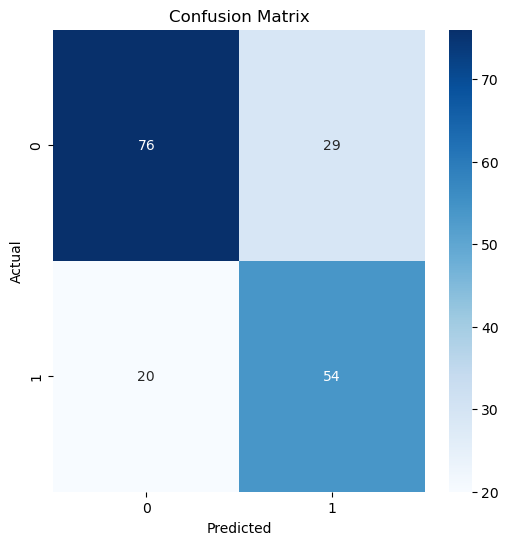

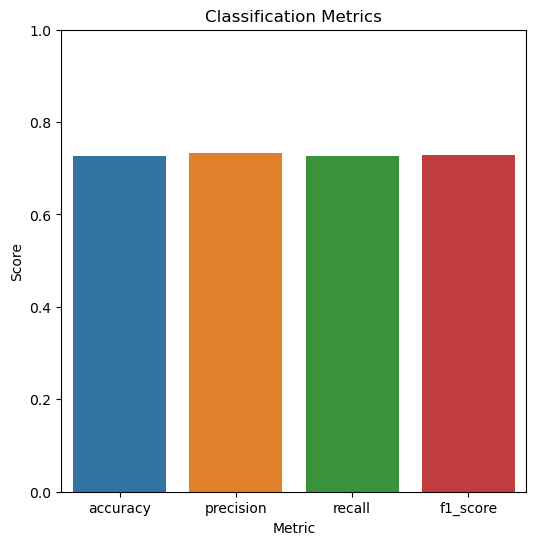

In [11]:
from dsba.model_evaluation import evaluate_classifier
from dsba.model_evaluation import visualize_classification_evaluation

model_evaluation = evaluate_classifier(clf, target_column, titanic_test)
visualize_classification_evaluation(model_evaluation)

In [12]:
# Training
from dsba.model_training import (train_random_forest_classifier, train_random_classifier,train_naive_positive_classifier, train_naive_negative_classifier)

from dsba.model_registry import save_model

random_forest_model, random_forest_metadata = train_random_classifier(titanic_train, target_column, "titanic_random_forest")
save_model(random_forest_model, random_forest_metadata)

random_model, random_metadata = train_random_classifier(titanic_train, target_column, "titanic_random")
save_model(random_model, random_metadata)

pos_model, pos_metadata = train_random_classifier(titanic_train, target_column, "titanic_naive_pos")
save_model(pos_model, pos_metadata)

neg_model, neg_metadata = train_random_classifier(titanic_train, target_column, "titanic_naive_neg")
save_model(neg_model, neg_metadata)

12:27:24, [INFO] Start 'training' a random classifier
12:27:24, [INFO] Done 'training' a random classifier
12:27:24, [INFO] Save model to path: /Users/faustin/Desktop/MLops/dsba-platform/models/titanic_random_forest.pkl
12:27:24, [INFO] Start 'training' a random classifier
12:27:24, [INFO] Done 'training' a random classifier
12:27:24, [INFO] Save model to path: /Users/faustin/Desktop/MLops/dsba-platform/models/titanic_random.pkl
12:27:24, [INFO] Start 'training' a random classifier
12:27:24, [INFO] Done 'training' a random classifier
12:27:24, [INFO] Save model to path: /Users/faustin/Desktop/MLops/dsba-platform/models/titanic_naive_pos.pkl
12:27:24, [INFO] Start 'training' a random classifier
12:27:24, [INFO] Done 'training' a random classifier
12:27:24, [INFO] Save model to path: /Users/faustin/Desktop/MLops/dsba-platform/models/titanic_naive_neg.pkl


In [13]:
from dsba.model_comparison import compare_models_simple
from dsba.preprocessing import preprocess_dataframe, split_features_and_target

print("Preprocessing test data...")

titanic_test_processed = preprocess_dataframe(titanic_test.copy())
X_test, y_test = split_features_and_target(titanic_test_processed, target_column)
print(f"Test set dimensions - X_test: {X_test.shape}, y_test: {y_test.shape}")

model_ids_to_compare = [
    "titanic_model",
    "titanic_random_forest",      
    "titanic_random",
    "titanic_naive_pos",
    "titanic_naive_neg"
]

metrics_to_calculate = ['accuracy', 'f1']

print(f"\nStarting model comparison for IDs: {model_ids_to_compare}")
comparison_results = compare_models_simple(model_ids_to_compare, X_test, y_test, metrics_to_calculate)

print("\nComparison Results:")
display(comparison_results)

12:27:27, [INFO] Load model from path: /Users/faustin/Desktop/MLops/dsba-platform/models/titanic_model.pkl
12:27:27, [INFO] Load model from path: /Users/faustin/Desktop/MLops/dsba-platform/models/titanic_random_forest.pkl
12:27:27, [INFO] Load model from path: /Users/faustin/Desktop/MLops/dsba-platform/models/titanic_random.pkl
12:27:27, [INFO] Load model from path: /Users/faustin/Desktop/MLops/dsba-platform/models/titanic_naive_pos.pkl
12:27:27, [INFO] Load model from path: /Users/faustin/Desktop/MLops/dsba-platform/models/titanic_naive_neg.pkl


Preprocessing test data...
Test set dimensions - X_test: (179, 11), y_test: (179,)

Starting model comparison for IDs: ['titanic_model', 'titanic_random_forest', 'titanic_random', 'titanic_naive_pos', 'titanic_naive_neg']

Comparison Results:


,model_id,accuracy,f1
0,titanic_model,0.726257,0.687898
1,titanic_random_forest,0.463687,0.466667
2,titanic_random,0.474860,0.426829
3,titanic_naive_pos,0.575419,0.542169
4,titanic_naive_neg,0.441341,0.397590
